# Smart Watch Price Predicton

### 1. Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### 2. Import the dataset

In [2]:
df=pd.read_csv("Smart watch prices.csv")

In [3]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size (inches),Resolution,Water Resistance (meters),Battery Life (days),Heart Rate Monitor,GPS,NFC,Price (USD)
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


### 4. Data Prepration

In [4]:
# Getting the information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Brand                      378 non-null    object 
 1   Model                      378 non-null    object 
 2   Operating System           376 non-null    object 
 3   Connectivity               378 non-null    object 
 4   Display Type               377 non-null    object 
 5   Display Size (inches)      376 non-null    float64
 6   Resolution                 375 non-null    object 
 7   Water Resistance (meters)  378 non-null    object 
 8   Battery Life (days)        378 non-null    object 
 9   Heart Rate Monitor         378 non-null    object 
 10  GPS                        378 non-null    object 
 11  NFC                        378 non-null    object 
 12  Price (USD)                378 non-null    object 
dtypes: float64(1), object(12)
memory usage: 38.6+ KB


In [5]:
# Checking for the null values

df.isnull().any()

Brand                        True
Model                        True
Operating System             True
Connectivity                 True
Display Type                 True
Display Size (inches)        True
Resolution                   True
Water Resistance (meters)    True
Battery Life (days)          True
Heart Rate Monitor           True
GPS                          True
NFC                          True
Price (USD)                  True
dtype: bool

In [6]:
df.isnull().sum()

Brand                        1
Model                        1
Operating System             3
Connectivity                 1
Display Type                 2
Display Size (inches)        3
Resolution                   4
Water Resistance (meters)    1
Battery Life (days)          1
Heart Rate Monitor           1
GPS                          1
NFC                          1
Price (USD)                  1
dtype: int64

In [7]:
# Replacing Null values in Cateogrical column with mode.

object_columns=df.select_dtypes(include=["object"]).columns
for col in object_columns:
    mode_value=df[col].mode()[0]
    df[col]=df[col].fillna(mode_value)

In [8]:
# Replacing Null values in float columns with mean

float_columns= df.select_dtypes(include=["float"]).columns
for col in float_columns:
    mean_value=df[col].mean()
    df[col]=df[col].fillna(mean_value)

In [9]:
df.isnull().any()

Brand                        False
Model                        False
Operating System             False
Connectivity                 False
Display Type                 False
Display Size (inches)        False
Resolution                   False
Water Resistance (meters)    False
Battery Life (days)          False
Heart Rate Monitor           False
GPS                          False
NFC                          False
Price (USD)                  False
dtype: bool

In [10]:
# Handling Independent columns

In [11]:
# We are renaming the columns for easy coding.
df=df.rename(columns={'Display Size (inches)':'Display Size','Water Resistance (meters)':'Water Resistance','Battery Life (days)':'Battery Life','Price (USD)':'Price'})

In [12]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC,Price
0,Apple,Watch Series 7,watchOS,"Bluetooth, Wi-Fi, Cellular",Retina,1.90,396 x 484,50,18,Yes,Yes,Yes,$399
1,Samsung,Galaxy Watch 4,Wear OS,"Bluetooth, Wi-Fi, Cellular",AMOLED,1.40,450 x 450,50,40,Yes,Yes,Yes,$249
2,Garmin,Venu 2,Garmin OS,"Bluetooth, Wi-Fi",AMOLED,1.30,416 x 416,50,11,Yes,Yes,No,$399
3,Fitbit,Versa 3,Fitbit OS,"Bluetooth, Wi-Fi",AMOLED,1.58,336 x 336,50,6,Yes,Yes,Yes,$229
4,Fossil,Gen 6,Wear OS,"Bluetooth, Wi-Fi",AMOLED,1.28,416 x 416,30,24,Yes,Yes,Yes,$299


In [13]:
df['Water Resistance'].unique()

array(['50', '30', '100', '1.5', 'Not specified', '200', '10'],
      dtype=object)

In [14]:
df['Water Resistance'].describe()

count     379
unique      7
top        50
freq      276
Name: Water Resistance, dtype: object

In [15]:
# We are replacing the not specified values in water resistance column

df['Water Resistance']=df['Water Resistance'].replace({'Not specified':'50'})


In [16]:
df['Display Size'].unique()

array([1.9       , 1.4       , 1.3       , 1.58      , 1.28      ,
       1.43      , 1.75      , 1.39      , 1.36316489, 1.65      ,
       1.2       , 1.57      , 1.        , 1.78      , 1.91      ,
       1.38      , 1.06      , 1.35      , 1.34      , 0.9       ,
       1.04      , 1.64      , 1.19      , 4.01      , 1.6       ,
       1.42      , 2.1       , 1.23      , 1.1       , 1.22      ,
       1.5       , 1.36      , 1.32      ])

In [17]:
# Rounding the above float numbers to 1 decimal point.

df['Display Size']=df['Display Size'].round(1)

In [18]:
df['Battery Life'].unique()

array(['18', '40', '11', '6', '24', '14', '2', '4', '12', '30', '3', '45',
       '5', '10', '48', '7', '16', '9', '25', '72', '60', '56', '70', '1',
       '48 hours', '15', 'Unlimited', '1.5', '20', '8'], dtype=object)

In [19]:
df['Battery Life'].describe()

count     379
unique     30
top        14
freq       84
Name: Battery Life, dtype: object

In [20]:
# We replace all the 48 hours and the Unlimited with top value of battery Life describe to deal with missing and confusing data.

df['Battery Life']= df['Battery Life'].replace({'48 hours':'14','Unlimited':'14'})

In [21]:
# It removes the dollar symbol before the price.

df['Price']=df['Price'].str[1:]

In [22]:
df['Water Resistance']=df['Water Resistance'].astype(float)
df['Battery Life']=df['Battery Life'].astype(float)
df['Price'] = df['Price'].str.replace(',', '').astype(float)

#### label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()

In [24]:
categorical_cols= df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col]=lb.fit_transform(df[col])

In [25]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,Heart Rate Monitor,GPS,NFC,Price
0,1,127,34,2,17,1.9,27,50.0,18.0,0,1,1,399.0
1,30,36,31,2,0,1.4,31,50.0,40.0,0,1,1,249.0
2,8,105,9,1,0,1.3,30,50.0,11.0,0,1,0,399.0
3,6,109,7,1,0,1.6,19,50.0,6.0,0,1,1,229.0
4,7,43,31,1,0,1.3,30,30.0,24.0,0,1,1,299.0


In [26]:
df=df.drop('Heart Rate Monitor', axis=1)

In [27]:
df.head()

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC,Price
0,1,127,34,2,17,1.9,27,50.0,18.0,1,1,399.0
1,30,36,31,2,0,1.4,31,50.0,40.0,1,1,249.0
2,8,105,9,1,0,1.3,30,50.0,11.0,1,0,399.0
3,6,109,7,1,0,1.6,19,50.0,6.0,1,1,229.0
4,7,43,31,1,0,1.3,30,30.0,24.0,1,1,299.0


### 3.Data Visualization

In [28]:
df.describe(include='all')

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC,Price
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.00000,379.000000
mean,18.168865,68.606860,20.778364,1.203166,6.941953,1.368074,22.139842,52.804749,12.208443,0.920844,0.83905,312.910290
std,13.040757,38.933753,11.407946,0.532927,8.978918,0.219087,9.080415,26.939235,12.326042,0.270338,0.36797,202.163738
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,1.500000,1.000000,0.000000,0.00000,49.000000
25%,7.000000,33.500000,9.000000,1.000000,0.000000,1.200000,17.500000,50.000000,3.000000,1.000000,1.00000,199.000000
50%,16.000000,71.000000,27.000000,1.000000,0.000000,1.400000,23.000000,50.000000,11.000000,1.000000,1.00000,279.000000
75%,31.000000,102.000000,31.000000,1.000000,14.000000,1.400000,32.000000,50.000000,15.000000,1.000000,1.00000,329.000000
max,41.000000,136.000000,34.000000,4.000000,26.000000,4.000000,35.000000,200.000000,72.000000,1.000000,1.00000,1800.000000


In [29]:
corr= df.corr()

In [30]:
corr

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC,Price
Brand,1.000000,-0.186603,0.446278,-0.014847,0.051461,0.004577,0.097720,-0.062857,0.029315,-0.006704,-0.037323,0.034120
Model,-0.186603,1.000000,0.006659,0.157626,-0.214145,0.201329,0.152353,-0.117374,-0.055969,0.012116,-0.031389,-0.255535
Operating System,0.446278,0.006659,1.000000,0.070087,-0.018799,-0.080955,0.203152,-0.148806,-0.024655,0.135836,0.113111,0.095368
Connectivity,-0.014847,0.157626,0.070087,1.000000,0.128524,0.327598,0.167958,-0.063198,0.074888,0.258820,0.140208,0.116510
Display Type,0.051461,-0.214145,-0.018799,0.128524,1.000000,-0.061327,-0.571427,0.267905,0.084369,0.010091,-0.038066,0.288813
Display Size,0.004577,0.201329,-0.080955,0.327598,-0.061327,1.000000,0.296800,-0.097811,0.091275,0.077819,0.155956,-0.024321
Resolution,0.097720,0.152353,0.203152,0.167958,-0.571427,0.296800,1.000000,-0.246476,-0.034026,0.244847,0.149269,-0.103550
Water Resistance,-0.062857,-0.117374,-0.148806,-0.063198,0.267905,-0.097811,-0.246476,1.000000,0.117514,0.103217,-0.232292,0.263472
Battery Life,0.029315,-0.055969,-0.024655,0.074888,0.084369,0.091275,-0.034026,0.117514,1.000000,-0.044258,0.012666,0.135795
GPS,-0.006704,0.012116,0.135836,0.258820,0.010091,0.077819,0.244847,0.103217,-0.044258,1.000000,0.137532,0.213436


Text(0.5, 1.0, 'HeatMap')

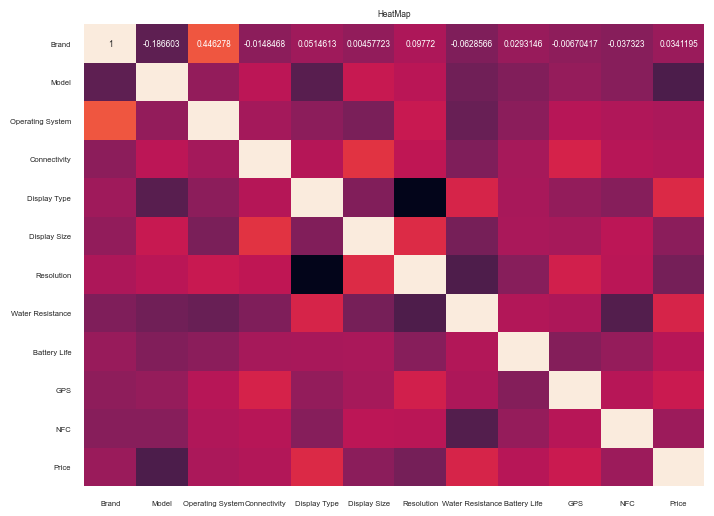

In [31]:
sns.set(font_scale=0.5)  # Set font scale to increase the font size in the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size to increase the size of the heatmap
sns.heatmap(corr, annot=True, fmt='g', cbar=False)
plt.title('HeatMap')

C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before o

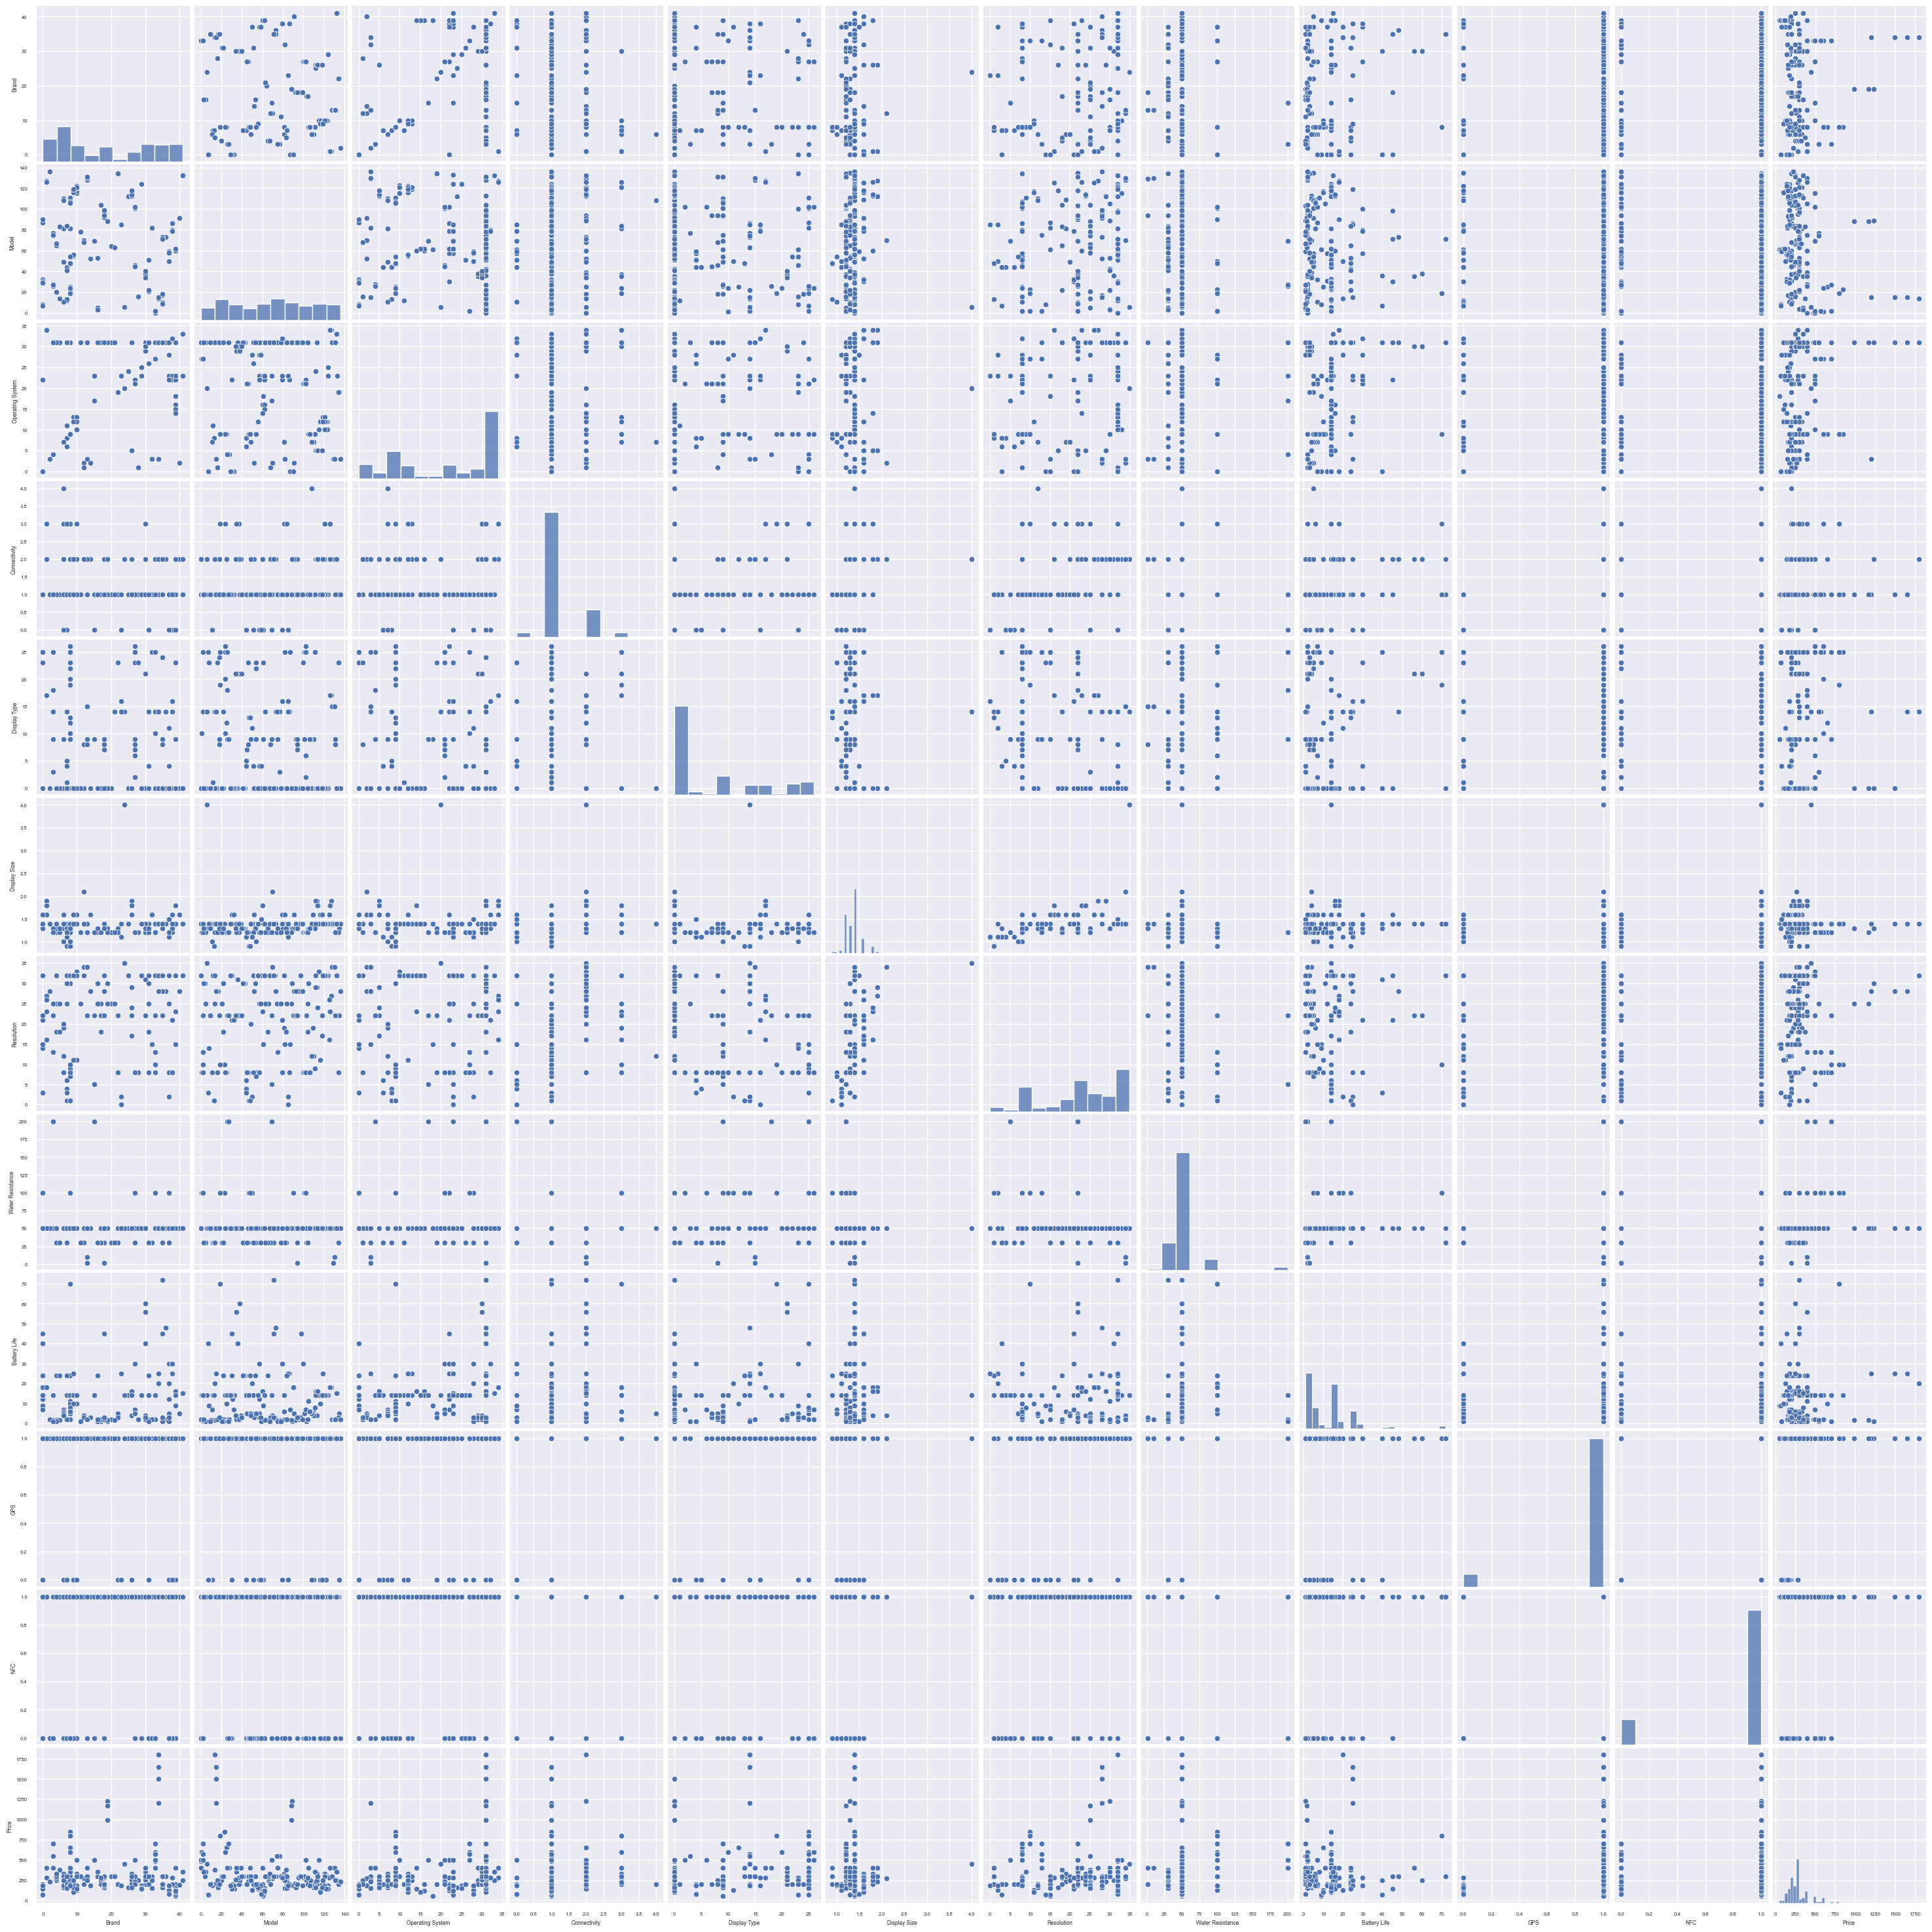

In [32]:
sns.pairplot(df)

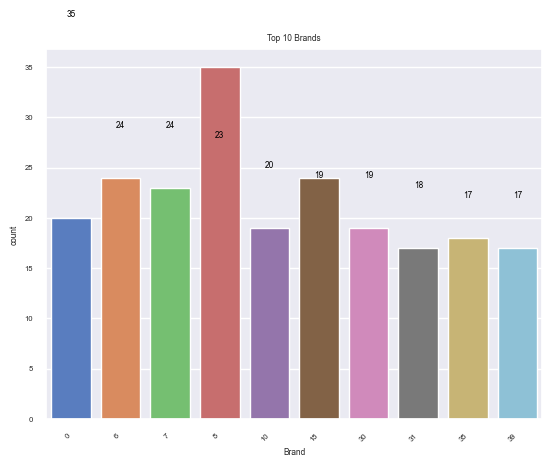

In [33]:
top_brands= df['Brand'].value_counts().index[:10] 
counts = df['Brand'].value_counts().values[:10]
sns.set_style("darkgrid")
ax = sns.barplot(x=top_brands, y=counts, palette="muted")
ax.set_xticklabels (ax.get_xticklabels (), rotation=45, ha='right')
for i, v in enumerate(counts): 
    ax.text(i, v+5, str(v), color='black', ha='center')
ax.set(xlabel='Brand', ylabel='count', title='Top 10 Brands')
plt.show()

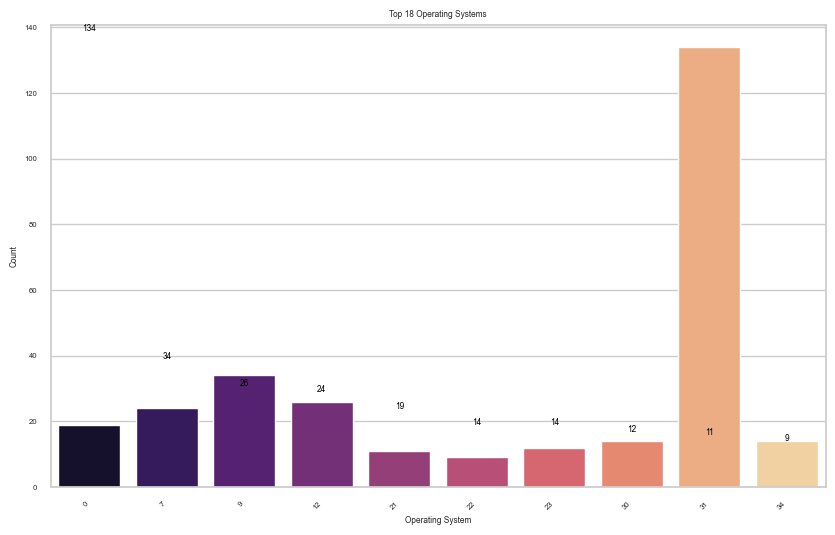

In [34]:
sns.set_style('whitegrid')
top_os=df['Operating System'].value_counts().index[:10] 
os_counts = df['Operating System'].value_counts().values[:10]
fig, ax = plt.subplots (figsize=(10, 6))
ax = sns.barplot(x=top_os, y=os_counts, palette='magma')
ax.set(xlabel='Operating System', ylabel='Count', title='Top 18 Operating Systems')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(os_counts): 
       ax.text(i, v+5, str(v), color='black', ha='center')
plt.show()

C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Pallavi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


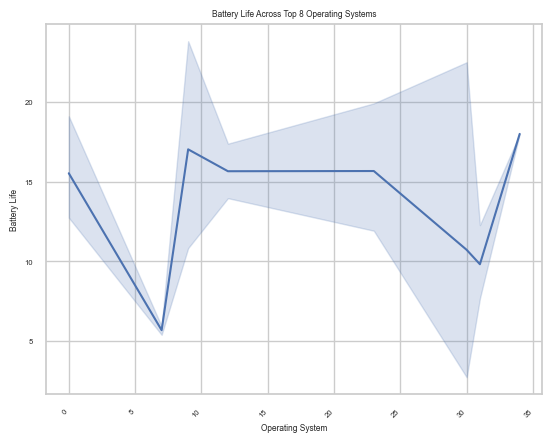

In [35]:
top_operating_systems = df['Operating System'].value_counts().head(8).index.tolist()
data_top_operating_systems = df[df['Operating System'].isin(top_operating_systems)]

sns.set_style('whitegrid')
sns.lineplot(x='Operating System', y='Battery Life', data=data_top_operating_systems)
plt.xlabel('Operating System')
plt.ylabel('Battery Life')
plt.title('Battery Life Across Top 8 Operating Systems')
plt.xticks(rotation=45, ha='right')
plt.show()

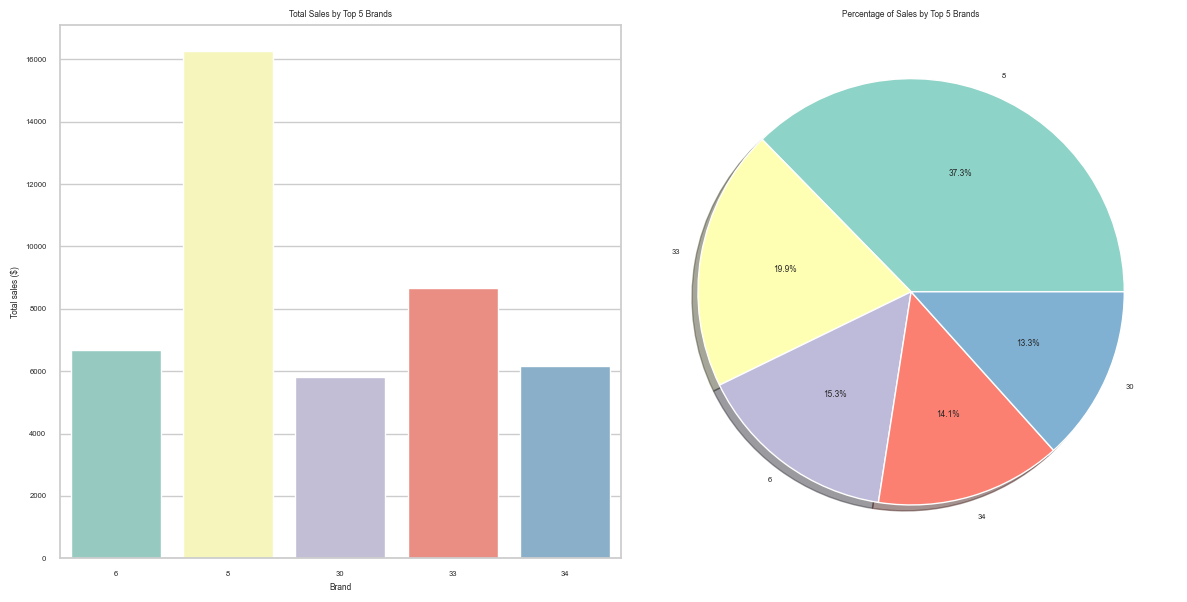

In [36]:
total_sales = df.groupby('Brand')['Price'].sum().reset_index()
top_brands = total_sales.sort_values('Price', ascending=False).head(5)
top_brands['Percent'] = (top_brands['Price'] / top_brands['Price'].sum()) * 100
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
sns.barplot(x='Brand', y='Price', data=top_brands, palette='Set3', ax=axes[0])
axes[0].set_xlabel('Brand')
axes[0].set_ylabel('Total sales ($)')
axes[0].set_title('Total Sales by Top 5 Brands')
colors = sns.color_palette('Set3', top_brands.shape[0]).as_hex()
axes[1].pie(top_brands['Percent'], labels=top_brands['Brand'], colors=colors, autopct='%1.1f%%', shadow=True)
axes[1].set_title('Percentage of Sales by Top 5 Brands')
fig.tight_layout()
plt.show()

### 5. Splitting data into Train and Test

In [37]:
X= df.drop(['Price'],axis=1)
X

,Brand,Model,Operating System,Connectivity,Display Type,Display Size,Resolution,Water Resistance,Battery Life,GPS,NFC
0,1,127,34,2,17,1.9,27,50.0,18.0,1,1
1,30,36,31,2,0,1.4,31,50.0,40.0,1,1
2,8,105,9,1,0,1.3,30,50.0,11.0,1,0
3,6,109,7,1,0,1.6,19,50.0,6.0,1,1
4,7,43,31,1,0,1.3,30,30.0,24.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
374,38,79,32,1,16,1.4,21,50.0,30.0,0,1
375,41,132,33,2,0,1.4,32,50.0,15.0,1,1
376,9,119,12,1,0,1.4,32,50.0,25.0,1,1
377,26,118,5,1,0,1.6,17,50.0,14.0,0,1


In [38]:
y=df['Price']
y

0      399.0
1      249.0
2      399.0
3      229.0
4      299.0
       ...  
374    279.0
375    349.0
376    249.0
377    159.0
378    299.0
Name: Price, Length: 379, dtype: float64

In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(303, 11)
(303,)
(76, 11)
(76,)


### 6.Model Building

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,mean_squared_log_error

#### 1. Linear Regression

In [41]:
lr= LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
predict_train=lr.predict(X_train)
predict_train

array([235.83178176, 240.11847735, 229.58183629, 429.58311767,
       255.05211228, 298.0652656 , 259.40782355, 361.49725481,
       396.37952397, 201.00153351, 270.26770026, 280.33571675,
       235.93441149, 154.88734068, 503.00258371, 400.66711912,
       320.71164875, 276.76584908, 162.1337816 , 325.74736006,
       281.6366732 , 221.39602102, 289.46676997, 402.52764935,
       292.02872727, 252.93593209, 320.71164875, 305.28667756,
       257.4231828 , 267.98421596, 407.6096201 , 306.17466633,
       308.50523694, 276.26510713, 370.76456099, 152.99072661,
       434.9413076 , 386.62342118, 276.0249498 , 294.09594525,
       235.83178176, 235.93441149, 339.26161487, 433.65031764,
       353.81293205, 229.28714551, 475.04857022, 447.33365739,
       412.65752435, 320.71164875, 312.24197811, 386.62342118,
       463.50275951, 606.01325131, 414.09538393, 361.09669032,
       395.57514515, 311.26033313, 486.29777449, 533.6570664 ,
       336.94989328, 352.21393945, 214.00016617, 253.91

In [43]:
# training score

error_score_lr_train= r2_score(y_train,predict_train)
print("R2 error is:",error_score_lr_train)
mse=mean_squared_error(y_train,predict_train)
rmse_lr_train=np.sqrt(mse)
print('Root Mean Squared Error:',rmse_lr_train)

R2 error is: 0.2295546632471358
Root Mean Squared Error: 179.89481395578446


In [44]:
predict_test=lr.predict(X_test)

In [45]:
# testing score

error_score_lr_test=r2_score(y_test,predict_test)
print("R2 error is:",error_score_lr_test)
mse=mean_squared_error(y_test,predict_test)
rmse_lr_test=np.sqrt(mse)
print("Root Mean Squared Error:",rmse_lr_test)

R2 error is: 0.16590308669836784
Root Mean Squared Error: 172.2507837673408


#### 2. Decision Tree Regression

In [46]:
dtr=DecisionTreeRegressor(max_depth=2,min_samples_split=6,min_samples_leaf=5)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=2, min_samples_leaf=5, min_samples_split=6)

In [47]:
predict_train_dtr= dtr.predict(X_train)

In [48]:
predict_test_dtr= dtr.predict(X_test)

In [49]:
# training Score

error_score_dtr_train=r2_score(y_train,predict_train_dtr)
print("R2 erroor is:",error_score_dtr_train)
mse=mean_squared_error(y_train,predict_train_dtr)
rmse_dtr_train=np.sqrt(mse)
print('Root Mean Squared Error:',rmse_dtr_train)

R2 erroor is: 0.3429614927518523
Root Mean Squared Error: 166.12811592656647


In [50]:
#testing score

error_score_dtr_test=r2_score(y_test,predict_test_dtr)
print("R2 erroor is:",error_score_dtr_test)
mse=mean_squared_error(y_test,predict_test_dtr)
rmse_dtr_test=np.sqrt(mse)
print('Root Mean Squared Error:',rmse_dtr_test)

R2 erroor is: 0.18085636154493812
Root Mean Squared Error: 170.69978774403583


#### 3. Random Forest Regression

In [51]:
rfr=RandomForestRegressor(n_estimators=50,max_depth=8,min_weight_fraction_leaf=0.05,max_features=0.8,random_state=42)
rfr.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, max_features=0.8,
                      min_weight_fraction_leaf=0.05, n_estimators=50,
                      random_state=42)

In [52]:
predict_train_rfr= rfr.predict(X_train)

In [53]:
predict_test_rfr=rfr.predict(X_test)

In [54]:
# training Score

error_score_rfr_train=r2_score(y_train,predict_train_rfr)
print("R2 erroor is:",error_score_rfr_train)
mse=mean_squared_error(y_train,predict_train_rfr)
rmse_rfr_train=np.sqrt(mse)
print('Root Mean Squared Error:',rmse_rfr_train)

R2 erroor is: 0.49758319869121215
Root Mean Squared Error: 145.2712940837865


In [55]:
#testing score

error_score_rfr_test=r2_score(y_test,predict_test_rfr)
print("R2 erroor is:",error_score_rfr_test)
mse=mean_squared_error(y_test,predict_test_rfr)
rmse_rfr_test=np.sqrt(mse)
print('Root Mean Squared Error:',rmse_rfr_test)

R2 erroor is: 0.4261481054255444
Root Mean Squared Error: 142.87388678752063


#### 4. Gradient Boosting Regressor

In [56]:
gbr=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=1,random_state=42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=1, random_state=42)

In [57]:
predict_train_gbr=gbr.predict(X_train)

In [58]:
predict_test_gbr=gbr.predict(X_test)

In [59]:
# training Score

error_score_gbr_train=r2_score(y_train,predict_train_gbr)
print("R2 erroor is:",error_score_gbr_train)
mse=mean_squared_error(y_train,predict_train_gbr)
rmse_gbr_train=np.sqrt(mse)
print('Root Mean Squared Error:',rmse_gbr_train)

R2 erroor is: 0.41649950162493654
Root Mean Squared Error: 156.55550514239548


In [60]:
#testing score

error_score_gbr_test=r2_score(y_test,predict_test_gbr)
print("R2 erroor is:",error_score_gbr_test)
mse=mean_squared_error(y_test,predict_test_gbr)
rmse_gbr_test=np.sqrt(mse)
print('Root Mean Squared Error:',rmse_gbr_test)

R2 erroor is: 0.4141301569073099
Root Mean Squared Error: 144.36220988703522


#### 5. XG Boost Regressor

In [61]:
import xgboost as xgb
xgb=xgb.XGBRegressor(n_estimators=1000,learning_rate=0.06,max_depth=2,sunsample=0.7,colsample_bytree=0.4,colsample_bylevel=0.5,max_leaves=3,random_state=1)
xgb.fit(X_train,y_train)

C:\Users\Pallavi\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [21:39:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07f6e447eee219473-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "sunsample" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=None, colsample_bytree=0.4,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.06, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=3, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [62]:
predict_train_xgb= xgb.predict(X_train)

In [63]:
predict_test_xgb=xgb.predict(X_test)

In [64]:
# training Score

error_score_xgb_train=r2_score(y_train,predict_train_xgb)
print("R2 erroor is:",error_score_xgb_train)
mse=mean_squared_error(y_train,predict_train_xgb)
rmse_xgb_train=np.sqrt(mse)
print('Root Mean Squared Error:',rmse_xgb_train)

R2 erroor is: 0.9219250785587862
Root Mean Squared Error: 57.26687782255483


In [65]:
#testing score

error_score_xgb_test=r2_score(y_test,predict_test_xgb)
print("R2 erroor is:",error_score_xgb_test)
mse=mean_squared_error(y_test,predict_test_xgb)
rmse_xgb_test=np.sqrt(mse)
print('Root Mean Squared Error:',rmse_xgb_test)

R2 erroor is: 0.805145250048114
Root Mean Squared Error: 83.2546401826171


# Comparing Models

In [66]:
results=pd.DataFrame(columns=['Model','Training R2','Testing R2','Traing RMSE','Testing RMSE'])
results.loc[0]=['Linear Regression',error_score_lr_train,error_score_lr_test,rmse_lr_train,rmse_lr_test]
results.loc[1]=['DecisionTreeRegressor',error_score_dtr_train,error_score_dtr_test,rmse_dtr_train,rmse_dtr_test]
results.loc[2]=['RandomForestRegressor',error_score_rfr_train,error_score_rfr_test,rmse_rfr_train,rmse_rfr_test]
results.loc[3]=['GradientBoostingRegressor',error_score_gbr_train,error_score_gbr_test,rmse_gbr_train,rmse_gbr_test]
results.loc[4]=['XG Boost Regressor',error_score_xgb_train,error_score_xgb_test,rmse_xgb_train,rmse_xgb_test]
print(results)

                       Model  Training R2  Testing R2  Traing RMSE  \
0          Linear Regression     0.229555    0.165903   179.894814   
1      DecisionTreeRegressor     0.342961    0.180856   166.128116   
2      RandomForestRegressor     0.497583    0.426148   145.271294   
3  GradientBoostingRegressor     0.416500    0.414130   156.555505   
4         XG Boost Regressor     0.921925    0.805145    57.266878   

   Testing RMSE  
0    172.250784  
1    170.699788  
2    142.873887  
3    144.362210  
4     83.254640  


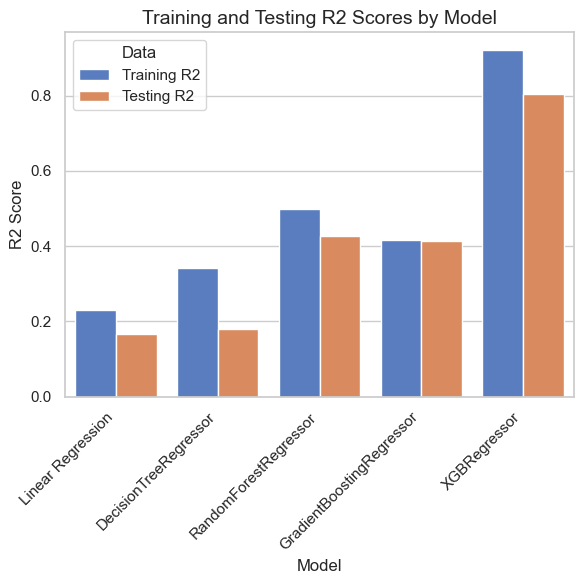

In [67]:
data = {
    'Model': ['Linear Regression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor'],
    'Training R2': [error_score_lr_train,error_score_dtr_train,error_score_rfr_train,error_score_gbr_train,error_score_xgb_train],
    'Testing R2':[error_score_lr_test,error_score_dtr_test,error_score_rfr_test,error_score_gbr_test,error_score_xgb_test]
}

# Create a DataFrame
results = pd.DataFrame(data)

# Melt the DataFrame to long format for easier plotting
results_long = pd.melt(results, id_vars='Model', value_vars=['Training R2', 'Testing R2'], var_name='Data', value_name='R2 Score')

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot using seaborn
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Model', y='R2 Score', hue='Data', data=results_long, palette='muted')

# Set axis labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.title('Training and Testing R2 Scores by Model', fontsize=14)

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


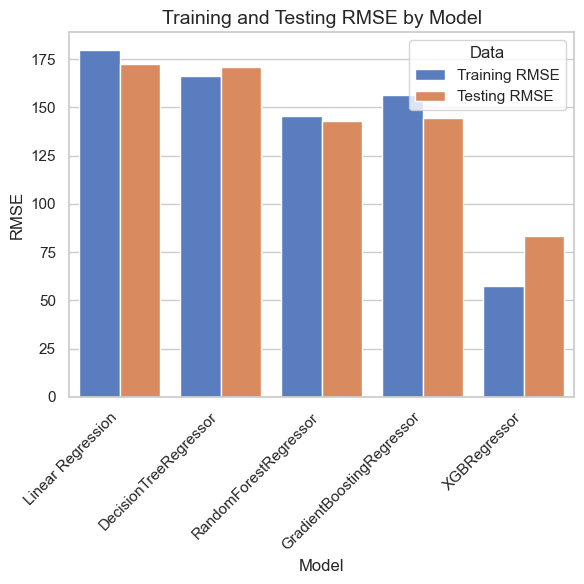

In [68]:
data = {
    'Model': ['Linear Regression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'GradientBoostingRegressor', 'XGBRegressor'],
    'Training RMSE': [rmse_lr_train,rmse_dtr_train,rmse_rfr_train,rmse_gbr_train,rmse_xgb_train],
    'Testing RMSE': [rmse_lr_test,rmse_dtr_test,rmse_rfr_test,rmse_gbr_test,rmse_xgb_test]
}

# Create a DataFrame
results_rmse = pd.DataFrame(data)

# Melt the DataFrame to long format for easier plotting
results_rmse_long = pd.melt(results_rmse, id_vars='Model', value_vars=['Training RMSE', 'Testing RMSE'], var_name='Data', value_name='RMSE')

# Set the style of the plot
sns.set(style="whitegrid")

# Create a bar plot for RMSE using seaborn
plt.figure(figsize=(6, 6))
ax = sns.barplot(x='Model', y='RMSE', hue='Data', data=results_rmse_long, palette='muted')

# Set axis labels and title
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.title('Training and Testing RMSE by Model', fontsize=14)

# Rotate x-axis tick labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


# Model Deployment

In [69]:
# dumping the selection model
pickle.dump(xgb,open('SW.pkl','wb'))

In [70]:
# This is the model that need to be built in error free one.